In [1]:

import zipfile
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import xml.etree.ElementTree as ET
import tensorflow as t


2024-06-18 19:42:58.412648: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:42:58.416104: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-18 19:42:58.462459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 19:42:59.302785: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Unzipping csv file

In [2]:

uploaded_zip = '/home/claney/EclipsePlatform/eclipse_platform.zip'
extract_dir = '/home/claney/extracted'
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
with zipfile.ZipFile(uploaded_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

csv_file = os.path.join(extract_dir, 'eclipse_platform.csv')
full_df = pd.read_csv(csv_file)

In [3]:
full_df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1,P3,Team,NaN,Usability issue with external editors (1GE6IRL),- Setup a project that contains a *.gif resour...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500
1,2,P5,Team,NaN,Opening repository resources doesnt honor type...,Opening repository resource always open the de...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400
2,3,P5,Team,NaN,Sync does not indicate deletion (1GIEN83),KM (10/2/2001 5:55:18 PM); \tThis PR about the...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400
3,4,P5,Team,NaN,need better error message if catching up over ...,- become synchronized with some project in a r...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500
4,5,P3,Team,NaN,ISharingManager sharing API inconsistent (1GAU...,For getting/setting the managed state of a res...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400


In [4]:
full_df.fillna(0,inplace=True)

In [5]:
full_df.head()


,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,1,P3,Team,0.0,Usability issue with external editors (1GE6IRL),- Setup a project that contains a *.gif resour...,CLOSED,FIXED,2.0,2001-10-10 21:34:00 -0400,2012-02-09 15:57:47 -0500
1,2,P5,Team,0.0,Opening repository resources doesnt honor type...,Opening repository resource always open the de...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-05-07 10:33:56 -0400
2,3,P5,Team,0.0,Sync does not indicate deletion (1GIEN83),KM (10/2/2001 5:55:18 PM); \tThis PR about the...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2010-05-07 10:28:53 -0400
3,4,P5,Team,0.0,need better error message if catching up over ...,- become synchronized with some project in a r...,RESOLVED,FIXED,2.0,2001-10-10 21:34:00 -0400,2002-03-01 16:27:31 -0500
4,5,P3,Team,0.0,ISharingManager sharing API inconsistent (1GAU...,For getting/setting the managed state of a res...,RESOLVED,WONTFIX,2.0,2001-10-10 21:34:00 -0400,2008-08-15 08:04:36 -0400


# Spliting testing and training

In [6]:
length=len(full_df)
split_index=int(.8*length)
df=full_df.iloc[:split_index] #df=training set


# Creating isDuplicate column

In [7]:
def is_duplicate(val):
    return 1 if val !=0.0 else 0
df['isDuplicate'] = df['Duplicated_issue'].apply(lambda x: is_duplicate(x))

print(df.head())

   Issue_id Priority Component  Duplicated_issue  \
0         1       P3      Team               0.0   
1         2       P5      Team               0.0   
2         3       P5      Team               0.0   
3         4       P5      Team               0.0   
4         5       P3      Team               0.0   

                                               Title  \
0    Usability issue with external editors (1GE6IRL)   
1  Opening repository resources doesnt honor type...   
2          Sync does not indicate deletion (1GIEN83)   
3  need better error message if catching up over ...   
4  ISharingManager sharing API inconsistent (1GAU...   

                                         Description    Status Resolution  \
0  - Setup a project that contains a *.gif resour...    CLOSED      FIXED   
1  Opening repository resource always open the de...  RESOLVED      FIXED   
2  KM (10/2/2001 5:55:18 PM); \tThis PR about the...  RESOLVED      FIXED   
3  - become synchronized with some project

/tmp/ipykernel_69769/832705925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isDuplicate'] = df['Duplicated_issue'].apply(lambda x: is_duplicate(x))


isDuplicate
0    56126
1    11998
Name: count, dtype: int64


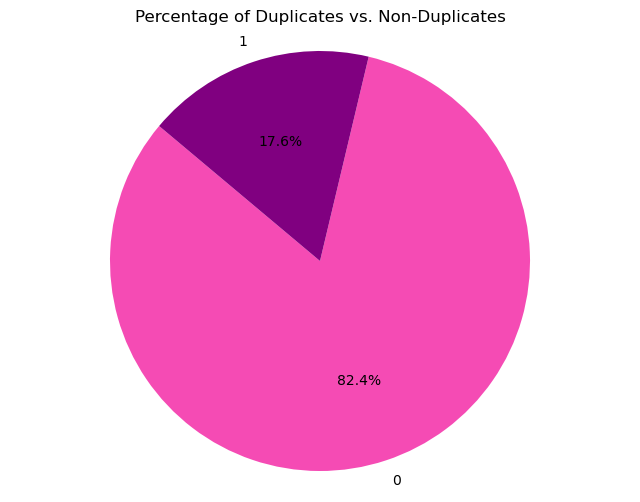

In [8]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'isDuplicate' is the column indicating duplicates
duplicate_counts = df['isDuplicate'].value_counts()

# Check the contents of duplicate_counts
print(duplicate_counts)

# Create a list of labels matching the length of duplicate_counts
# Ensure the labels match the values in the 'isDuplicate' column
labels = duplicate_counts.index.tolist()

# Define colors (length should match number of unique values in 'isDuplicate')
colors = ['#F54BB4', 'purple'][:len(labels)]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(duplicate_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Duplicates vs. Non-Duplicates')
plt.axis('equal')
plt.show()


# Preprocessing

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/claney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df['Description'] = df['Description'].astype(str).fillna('')


/tmp/ipykernel_69740/3304891465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].astype(str).fillna('')


In [11]:
#tokenization
def tokenize_description(description):
    return word_tokenize(description)
df['Description'] = df['Description'].apply(tokenize_description)
df['Title'] = df['Title'].apply(tokenize_description)
print(df.Description)
print(df.Title)

/tmp/ipykernel_69740/3571378915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].apply(tokenize_description)


0        [-, Setup, a, project, that, contains, a, *, ....
1        [Opening, repository, resource, always, open, ...
2        [KM, (, 10/2/2001, 5:55:18, PM, ), ;, This, PR...
3        [-, become, synchronized, with, some, project,...
4        [For, getting/setting, the, managed, state, of...
                               ...                        
68119    [Build, ID, :, 3.3, (, I, am, not, sure, what,...
68120    [There, are, several, NPEs, within, the, UI, s...
68121    [I20080501-0100, ;, ;, Now, that, were, using,...
68122    [Created, attachment, 98318, ;, screenshot, ;,...
68123    [Build, ID, :, M20080221-1800, ;, ;, Steps, To...
Name: Description, Length: 68124, dtype: object
0        [Usability, issue, with, external, editors, (,...
1        [Opening, repository, resources, doesnt, honor...
2        [Sync, does, not, indicate, deletion, (, 1GIEN...
3        [need, better, error, message, if, catching, u...
4        [ISharingManager, sharing, API, inconsistent, ...
        

/tmp/ipykernel_69740/3571378915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].apply(tokenize_description)


In [12]:
print(df['Description'].info)

<bound method Series.info of 0        [-, Setup, a, project, that, contains, a, *, ....
1        [Opening, repository, resource, always, open, ...
2        [KM, (, 10/2/2001, 5:55:18, PM, ), ;, This, PR...
3        [-, become, synchronized, with, some, project,...
4        [For, getting/setting, the, managed, state, of...
                               ...                        
68119    [Build, ID, :, 3.3, (, I, am, not, sure, what,...
68120    [There, are, several, NPEs, within, the, UI, s...
68121    [I20080501-0100, ;, ;, Now, that, were, using,...
68122    [Created, attachment, 98318, ;, screenshot, ;,...
68123    [Build, ID, :, M20080221-1800, ;, ;, Steps, To...
Name: Description, Length: 68124, dtype: object>


In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
#creating freeform textual data column
df['full_text_data']=df['Description']+df['Title']
print(df['full_text_data'])

0        - Setup a project that contains a *.gif resour...
1        Opening repository resource always open the de...
2        KM (10/2/2001 5:55:18 PM); \tThis PR about the...
3        - become synchronized with some project in a r...
4        For getting/setting the managed state of a res...
                               ...                        
68119    Build ID: 3.3 (I am not sure what You mean by ...
68120    There are several NPEs within the UI session t...
68121    I20080501-0100; ; Now that were using the coll...
68122    Created attachment 98318; screenshot; ; I20080...
68123    Build ID: M20080221-1800; ; Steps To Reproduce...
Name: full_text_data, Length: 68124, dtype: object


/tmp/ipykernel_69769/1792392707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_data']=df['Description']+df['Title']


# Creating topics using LDA

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Assuming 'df' is your DataFrame containing the text data
# Fill missing values in 'full_text_data' column with empty strings
df['full_text_data'].fillna('', inplace=True)

# Initialize CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

# Fit and transform the CountVectorizer on the text data
counts = count_vectorizer.fit_transform(df['full_text_data'])

count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
counts = count_vectorizer.fit_transform(df['full_text_data'])

        # Fit LDA model
lda = LatentDirichletAllocation(n_components=7, max_iter=10,learning_method='online',learning_offset=50.,random_state=0)
lda.fit(counts)


/tmp/ipykernel_69769/2616848551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text_data'].fillna('', inplace=True)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          n_components=7, random_state=0)

In [12]:
feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-20 - 1:-1]]))
        
        print()

Topic 1:
framework junit dylib tests thread versions frameworks test com library apple testsuite 4xestacktrace libclient uitestapplication testresult testcase carbon 0010 remotetestrunner

Topic 2:
eclipse org core osgi update framework plugins message ui com jar bundle platform help equinox http ibm runtime apache entry

Topic 3:
swt new shell display line string public table int event import eclipse null object void org tree image item return

Topic 4:
lib eclipse 03 00000000 usr dll 00 object jar xp system32 org java windows lang plugins rwxp jre 08 02

Topic 5:
java org eclipse internal ui core swt run widgets main workbench jface display runtime lang method widget reflect launcher invoke

Topic 6:
editor text view open window line click dialog help search page menu select perspective tab does button ctrl editors right

Topic 7:
file project build eclipse new cvs error view workspace files use dialog using does bug problem create user set like



In [13]:
#for alll columns in the df 
#compare each bug report to each topic 
#if
topic_distributions = lda.transform(counts)

In [14]:
df['topic'] = topic_distributions.argmax(axis=1)

# Create DataFrames for each topic
topic_dfs = []
for topic_idx in range(7):
    topic_df = df[df['topic'] == topic_idx].copy()
    topic_dfs.append(topic_df)

# Display the DataFrames for each topic
for i, topic_df in enumerate(topic_dfs):
    print(f"Topic {i}:")
    print(topic_df['full_text_data'])
    print()

# Optionally, you can save each DataFrame to a CSV file
for i, topic_df in enumerate(topic_dfs):
    topic_df.to_csv(f'topic_{i}_bug_reports.csv', index=False)

/tmp/ipykernel_69769/2460893164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic'] = topic_distributions.argmax(axis=1)


Topic 0:
2735     Eclipse cannot display Japanese letters in the...
2736     Please see the following test result of NLSed ...
3320                                 This is a test PRTest
4775     The following entries in the org.eclipse.jface...
6971     There are no senders of ResourceState:storeSta...
                               ...                        
67512    In recent builds:; ; WIN XP; SUN 1.4.2; ; Wron...
67525    I have a java application that has been workin...
67599    1. Make a view a fast view.; 2. Click on the n...
67826     Simplification in ContentMergeViewer#setRight...
68048    I20080429-0100.; ; CachedMarkerBuilder writes ...
Name: full_text_data, Length: 275, dtype: object

Topic 1:
105      The ingore resources page has the list box far...
221      prefix        test; name          181178; refe...
222      prefix        test; name          181342; refe...
245      I created a new stream in the repository; made...
295      |     To:  Brian Young/OTT/OTI@OTI; Da

In [15]:
topic_0_df=pd.read_csv('topic_0_bug_reports.csv')
topic_1_df=pd.read_csv('topic_1_bug_reports.csv')
topic_2_df=pd.read_csv('topic_2_bug_reports.csv')
topic_3_df=pd.read_csv('topic_3_bug_reports.csv')
topic_4_df=pd.read_csv('topic_4_bug_reports.csv')
topic_5_df=pd.read_csv('topic_5_bug_reports.csv')
topic_6_df=pd.read_csv('topic_6_bug_reports.csv')

In [16]:
topic_0_df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,isDuplicate,full_text_data,topic
0,6135,P2,UI,0.0,NLS WSDD problems in IDE and VM - Japanese pro...,Eclipse cannot display Japanese letters in the...,CLOSED,FIXED,1.0,2001-11-20 17:49:00 -0500,2005-05-10 14:56:02 -0400,0,Eclipse cannot display Japanese letters in the...,0
1,6137,P2,UI,0.0,NLS WSDD problems in IDE and VM - ASCII project,Please see the following test result of NLSed ...,CLOSED,FIXED,1.0,2001-11-20 17:54:00 -0500,2005-05-10 14:56:28 -0400,0,Please see the following test result of NLSed ...,0
2,7394,P3,UI,0.0,Test,This is a test PR,RESOLVED,INVALID,1.0,2002-01-09 13:47:00 -0500,2002-01-21 21:29:19 -0500,0,This is a test PRTest,0
3,10114,P3,Releng,0.0,NL: WSWB rollup 2 - Japanese translations have...,The following entries in the org.eclipse.jface...,CLOSED,FIXED,2.0,2002-02-22 14:45:00 -0500,2002-11-21 14:23:47 -0500,0,The following entries in the org.eclipse.jface...,0
4,14461,P3,Team,0.0,Dav: No senders of ResourceState:storeState(),There are no senders of ResourceState:storeSta...,RESOLVED,FIXED,2.0,2002-04-23 18:14:00 -0400,2002-05-23 21:21:02 -0400,0,There are no senders of ResourceState:storeSta...,0


In [17]:
topic_1_df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,isDuplicate,full_text_data,topic
0,106,P5,Team,0.0,Layout odd with Ignore resources pref page (1G...,The ingore resources page has the list box far...,RESOLVED,INVALID,2.0,2001-10-10 21:36:00 -0400,2002-05-02 14:47:45 -0400,0,The ingore resources page has the list box far...,1
1,222,P5,Team,0.0,New Stream menu item is incorrectly enabled (1...,prefix test; name 181178; refe...,RESOLVED,INVALID,2.0,2001-10-10 21:38:00 -0400,2002-02-07 12:39:08 -0500,0,prefix test; name 181178; refe...,1
2,223,P3,Team,0.0,Save in team stream merger confusing (1GI7HXG),prefix test; name 181342; refe...,VERIFIED,FIXED,2.0,2001-10-10 21:38:00 -0400,2002-04-09 14:40:01 -0400,0,prefix test; name 181342; refe...,1
3,246,P3,Team,0.0,Problems merging streams (1GJV7C4),I created a new stream in the repository; made...,RESOLVED,INVALID,2.0,2001-10-10 21:38:00 -0400,2002-03-22 13:48:42 -0500,0,I created a new stream in the repository; made...,1
4,832,P3,User Assistance,0.0,Verify Javadoc for API (1GIV2LU),| To: Brian Young/OTT/OTI@OTI; Dave Thoms...,RESOLVED,FIXED,2.0,2001-10-10 21:48:00 -0400,2002-04-05 14:05:52 -0500,0,| To: Brian Young/OTT/OTI@OTI; Dave Thoms...,1


In [18]:
gpt_Summary=pd.read_csv('summary text - Sheet1.csv')

# Small Summarization using GPT 

In [19]:
gpt_Summary.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,isDuplicate,full_text_data,topic,summary
0,243,P5,Team,0,2.0 rework: No senders of IRepository.isWritab...,There are no senders of IRepository.isWritable...,RESOLVED,INVALID,2,##########,##########,0,There are no senders of IRepository.isWritable...,2,No occurrences of IRepository.isWritable() or ...
1,1533,P2,Debug,0,Feature: notification of changing variables (1...,DW (12/8/00 4:03:27 PM); The old VAME debugger...,VERIFIED,FIXED,2,##########,##########,0,DW (12/8/00 4:03:27 PM); The old VAME debugger...,2,Request for notification of changing variables...
2,1767,P1,SWT,0,Display ASCII for values greater than 127 fail...,public class Hello() {; ; public static void m...,RESOLVED,FIXED,2,##########,##########,0,public class Hello() {; ; public static void m...,2,Failure of displaying ASCII values for charact...
3,1781,P3,Scripting,0,Usability: Script editor outline expansion sta...,1. Create a script file test.xhtml; 2. Select ...,RESOLVED,INVALID,2,##########,##########,0,1. Create a script file test.xhtml; 2. Select ...,2,Loss of expansion state in the script editor o...
4,1859,P3,UI,0,Esc does not disable PropertySheet Text Cell E...,Create a File A.usr.; Select a text field on t...,RESOLVED,FIXED,2,##########,##########,0,Create a File A.usr.; Select a text field on t...,2,ressing ESC after editing a text field in the ...


SyntaxError: expected ':' (1662501303.py, line 2)